In [ ]:
URL = "https://raw.githubusercontent.com/SharanSMenon/swin-transformer-hub/main/imagenet_labels.json" # Imagenet labels
!wget https://www.allaboutbirds.org/guide/assets/photo/306327661-480px.jpg -O house_finch.jpg

--2022-04-03 18:05:06--  https://www.allaboutbirds.org/guide/assets/photo/306327661-480px.jpg
Resolving www.allaboutbirds.org (www.allaboutbirds.org)... 104.26.1.144, 104.26.0.144, 172.67.69.67, ...
Connecting to www.allaboutbirds.org (www.allaboutbirds.org)|104.26.1.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20694 (20K) [image/jpeg]
Saving to: ‘house_finch.jpg’

house_finch.jpg     100%[===================>]  20.21K  --.-KB/s    in 0s      

2022-04-03 18:05:07 (105 MB/s) - ‘house_finch.jpg’ saved [20694/20694]



In [ ]:
import torch
import torchvision
from PIL import Image

In [ ]:
!pip install timm

     |████████████████████████████████| 431 kB 10.1 MB/s 


In [ ]:
import timm
timm.list_models("swin*", pretrained=True)

['swin_base_patch4_window7_224',
 'swin_base_patch4_window7_224_in22k',
 'swin_base_patch4_window12_384',
 'swin_base_patch4_window12_384_in22k',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window7_224_in22k',
 'swin_large_patch4_window12_384',
 'swin_large_patch4_window12_384_in22k',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224']

In [ ]:
model = timm.create_model('swin_base_patch4_window7_224', pretrained=True)


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_base_patch4_window7_224_22kto1k.pth" to /root/.cache/torch/hub/checkpoints/swin_base_patch4_window7_224_22kto1k.pth


In [ ]:
from torchvision import transforms as T

In [ ]:
trans_ = T.Compose([
                    T.Resize(256),
                    T.CenterCrop(224),
                    T.ToTensor(),
                    T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD)
])

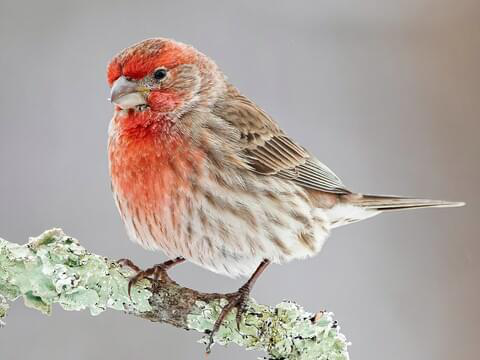

In [ ]:
image = Image.open("house_finch.jpg")
image

In [ ]:
transformed = trans_(image)
batch = transformed.unsqueeze(0)

In [ ]:
with torch.no_grad():
  output = model(batch)


In [ ]:
class_ = output.argmax(dim=1)
class_

tensor([12])

In [ ]:
import json
from urllib.request import urlopen

In [ ]:
response = urlopen(URL)
classes = json.loads(response.read())
len(classes)

1000

In [ ]:
classes[class_]

'house finch'